A dataset from ABC company, consisting of 458 rows and 9 columns. 
The company requires a comprehensive report detailing information about their employees across various teams. 

# Preprocessing the data:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
Ensure data consistency and integrity before proceeding with analysis.

In [3]:
# to deactivate warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
import numpy as np
import pandas as pd 
data=pd.read_excel("myexcel.xlsx")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [9]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [11]:
df = pd.DataFrame(data)
data['Height'] = np.random.randint(150, 181, size=len(data))

print(data)


              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     153     180   
1      Jae Crowder  Boston Celtics      99       SF   25     171     235   
2     John Holland  Boston Celtics      30       SG   27     152     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     171     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     174     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     159     203   
454      Raul Neto       Utah Jazz      25       PG   24     159     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     158     256   
456    Jeff Withey       Utah Jazz      24        C   26     162     231   
457       Priyanka       Utah Jazz      34        C   25     158     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [13]:
# Replace NaN values in college,salary columns with zero values
df[['College', 'Salary']]= df[['College', 'Salary']].fillna(0)  

print(df)

              Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00   

     Weight            Coll

Tasks: 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 


Employee Distribution Across Teams:
                        Employees  Percentage
Team                                         
New Orleans Pelicans           19    4.148472
Memphis Grizzlies              18    3.930131
Utah Jazz                      16    3.493450
New York Knicks                16    3.493450
Milwaukee Bucks                16    3.493450
Brooklyn Nets                  15    3.275109
Portland Trail Blazers         15    3.275109
Oklahoma City Thunder          15    3.275109
Denver Nuggets                 15    3.275109
Washington Wizards             15    3.275109
Miami Heat                     15    3.275109
Charlotte Hornets              15    3.275109
Atlanta Hawks                  15    3.275109
San Antonio Spurs              15    3.275109
Houston Rockets                15    3.275109
Boston Celtics                 15    3.275109
Indiana Pacers                 15    3.275109
Detroit Pistons                15    3.275109
Cleveland Cavaliers            15    3.2751

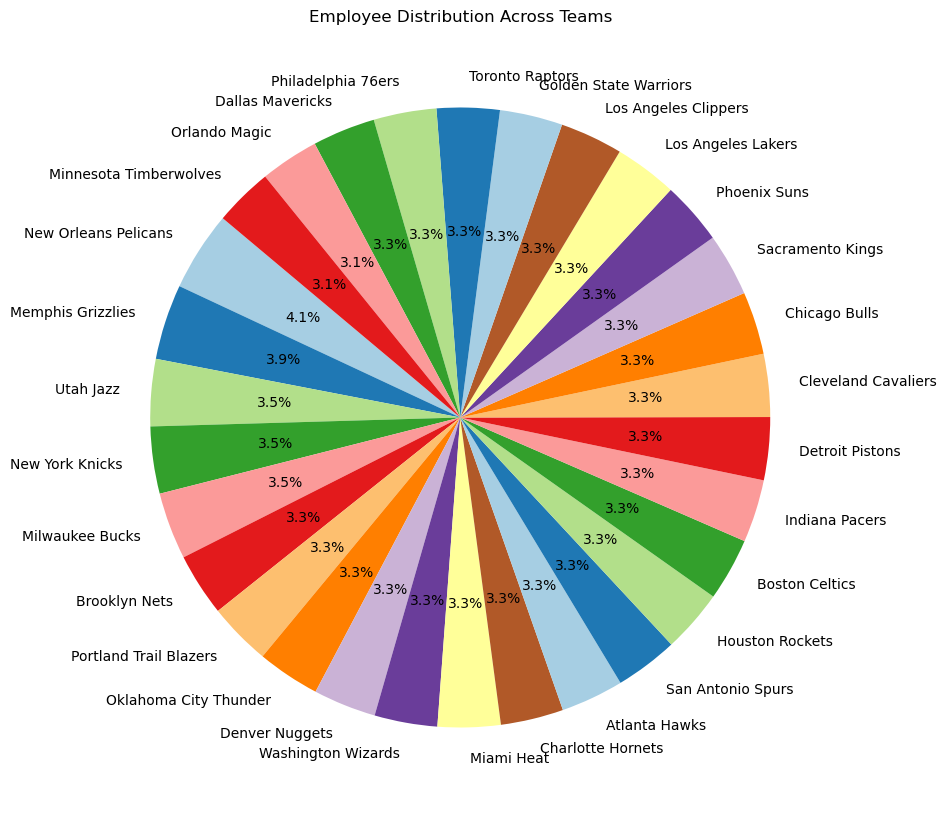

In [17]:
team_distribution = df["Team"].value_counts()
total_employees = len(df)
total_employees
percentage_split = (team_distribution / total_employees) * 100
result_df = pd.DataFrame({"Employees": team_distribution, "Percentage": percentage_split})

# Display the results
print("\nEmployee Distribution Across Teams:")
print(result_df)



import pandas as pd
import matplotlib.pyplot as plt


# Plot a pie chart
plt.figure(figsize=(10,20))
plt.gca().set_facecolor("blue")  # Sets the face color of the axes
plt.pie(result_df["Percentage"], labels=result_df.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)

plt.title("Employee Distribution Across Teams")
plt.show()

Task 2. Segregate employees based on their positions within the company.

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64
458

Employee Segregation Based on Positions:
          Employees  Percentage(%)
Position                          
SG              102      22.270742
PF              100      21.834061
PG               92      20.087336
SF               85      18.558952
C                79      17.248908


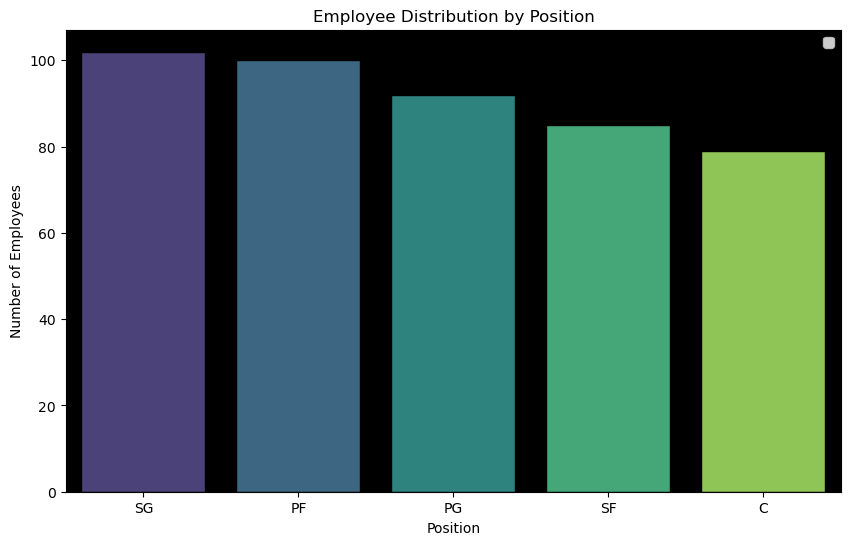

In [19]:
position_distribution = df["Position"].value_counts()
print(position_distribution)
print(sum(position_distribution))

percentage_split = (position_distribution / total_employees) * 100

result_df = pd.DataFrame({"Employees": position_distribution, "Percentage(%)": percentage_split})

# Display the results
print("\nEmployee Segregation Based on Positions:")
print(result_df)

#creating Bar chart 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor("black")  # Sets the face color of the axes
sns.barplot(x=result_df.index, y=result_df["Employees"], palette="viridis",edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Position")
plt.legend()
plt.show()

Task 3. Identify the predominant age group among employees.

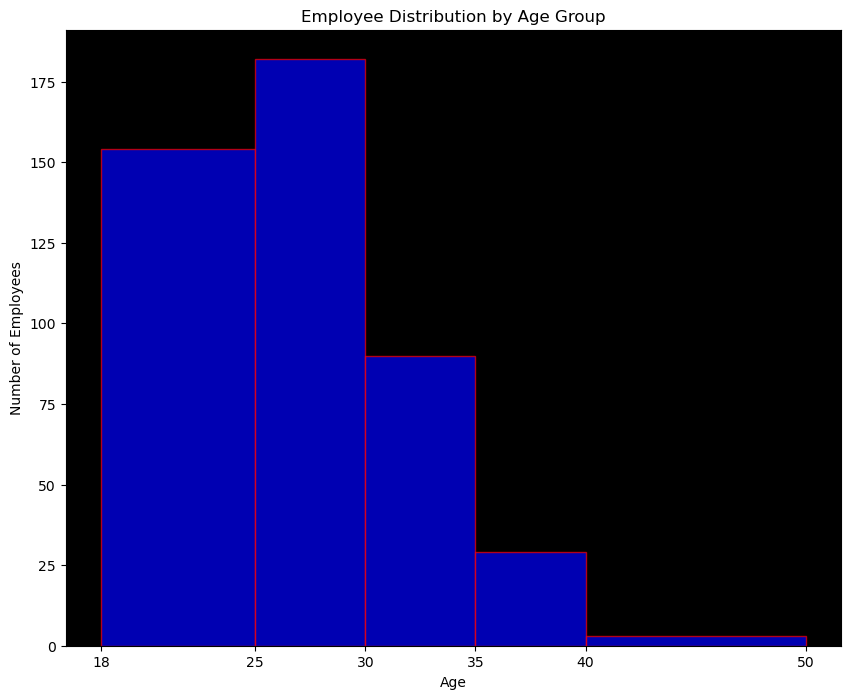

Employee Distribution by Age Group:
Age Group
26-30    182
18-25    154
31-35     90
36-40     29
41-50      3
Name: count, dtype: int64

Predominant Age Group: 26-30


In [21]:
# Define age groups
bins = [18, 25, 30, 35, 40, 50]  # Age ranges
labels = ["18-25", "26-30", "31-35", "36-40", "41-50"]

# Create a new column for age groups
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Count the number of employees in each age group
age_group_distribution = df["Age Group"].value_counts()

# Identify the predominant age group
predominant_age_group = age_group_distribution.idxmax()

# Plot Histogram
plt.figure(figsize=(10, 8))
plt.hist(df["Age"], alpha=0.7, color="blue",bins=bins, edgecolor='red')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Age Group")
plt.xticks(bins)  # Mark bin edges
plt.gca().set_facecolor("black")  # Sets the face color of the axes
plt.show()

# Display results
print("Employee Distribution by Age Group:")
print(age_group_distribution)
print(f"\nPredominant Age Group: {predominant_age_group}")

Task 4. Discover which team and position have the highest salary expenditure. (2 marks) 

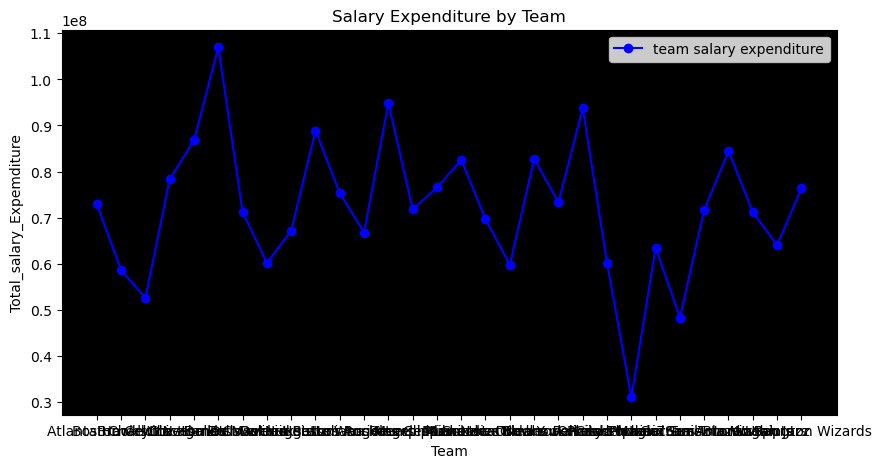

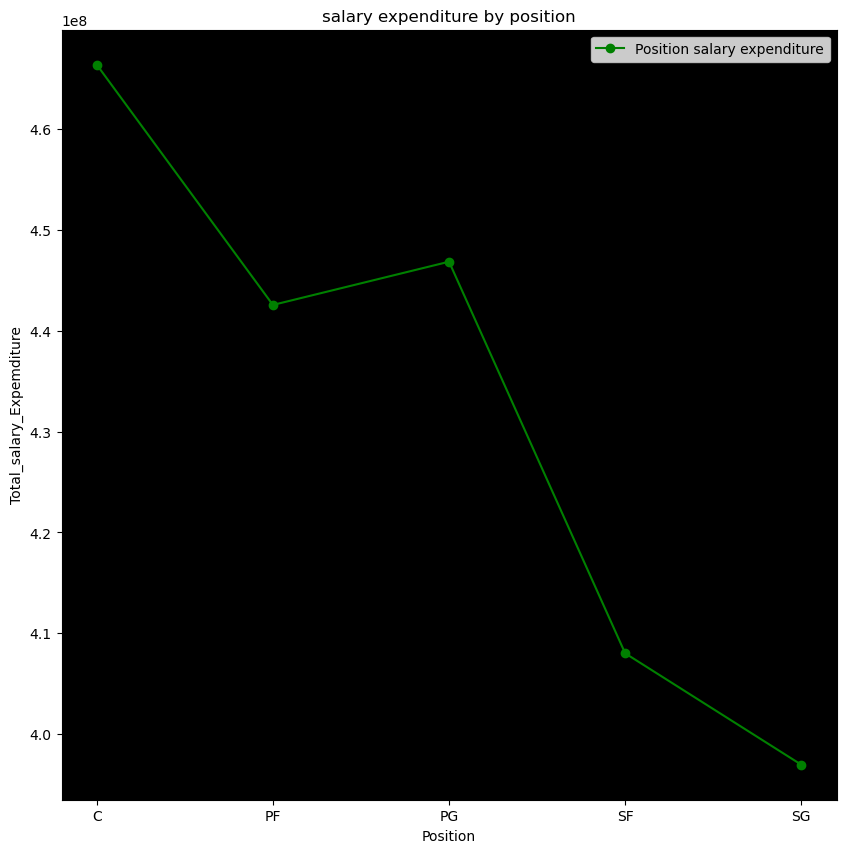

Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
salary_expenditure=df.groupby("Team")["Salary"].sum()
Highest_salary=salary_expenditure.idxmax()


# Line chart 1
plt.figure(figsize=(10,5))
plt.gca().set_facecolor("black")  # Sets the face color of the axes
plt.plot(salary_expenditure.index,salary_expenditure.values,marker="o",linestyle="-",color="b",label="team salary expenditure")
plt.xlabel("Team")
plt.ylabel('Total_salary_Expemditure')
plt.title('Salary Expenditure by Team')
plt.legend()
plt.show()

# ine chart 2
salary_expenditure_position=df.groupby("Position")["Salary"].sum()
Highest_salary_position=salary_expenditure_position.idxmax()

plt.figure(figsize=(10,10))
plt.gca().set_facecolor("black")  # Sets the face color of the axes
plt.plot(salary_expenditure_position.index,salary_expenditure_position.values,marker="o",linestyle="-",color="g",label="Position salary expenditure")
plt.xlabel("Position")
plt.ylabel('Total_salary_Expemditure')
plt.title('salary expenditure by position')
plt.legend()
plt.show()
print("Team with highest salary expenditure:",Highest_salary)
print("Position with highest salary expenditure:",Highest_salary_position)


Task 5. Investigate if there's any correlation between age and salary, and represent it visually.

In [494]:
data=pd.read_excel("myexcel.xlsx")

Correlation between Age and Salary: 0.21


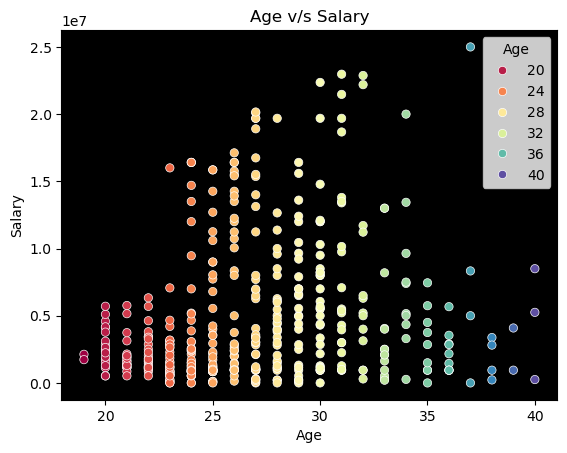

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Creating a Linechart 
correlation = df[["Age","Salary"]].corr().iloc[0,1]
print(f"Correlation between Age and Salary: {correlation:.2f}")
sns.scatterplot(
x=df["Age"], y=df["Salary"], data=df,hue="Age", palette="Spectral", alpha=1,color="green")

# Add regression line

plt.gca().set_facecolor("black")  # Sets the face color of the axes
plt.title("Age v/s Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

# Data Story & Insights:

# Analysis of ABC Company Dataset

<!-- 1. Employee Distribution Across Teams: -->
The team with the highest number of employees is New Orleans Pelicans, accounting for 4.14% of the total workforce.
<!-- 2. Employee Distribution by Position: -->
The most common position among employees is SG (Shooting Guard), with 102 employees.
<!-- 3. Employee Distribution by Age Group: -->
The predominant age group is 26-30 years, comprising 182 employees.
<!-- 4. Salary Expenditure Analysis: -->
Team with the highest salary expenditure: Cleveland Cavaliers
Position with the highest salary expenditure: Center (C)
<!-- 5. Correlation Between Age and Salary -->
The correlation coefficient between age and salary is 0.21, indicating a weak positive relationship.


In [ ]:
# Key Trends Observed
1.The majority of employees are in the New Orleans Pelicans team.
2.SG (Shooting Guard) is the most common position among employees.
3.Employees in the 26-30 age group are the most prevalent.
4.Cleveland Cavaliers spend the most on salaries among teams, while Centers (C) receive the highest salaries among positions.
5.There is a slight positive correlation between age and salary, suggesting that salaries tend to increase with age, but not strongly.